## Practica 7

Implementacion de una red neuronal sencilla (dos capas) mediante el modulo Keras. El objetivo es entrenar la red neuronal para los datos de entrenamiento proporcionados y verificar el funcionamiento del algoritmo cuando se utiliza batching.

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import keras
%matplotlib inline

In [44]:
# Datos de entrenamiento
x = np.array([1, -1])
t = np.array([2, -1])

In [45]:
# Creacion de la red neuronal
nn = keras.models.Sequential()

In [46]:
# Agregar la primera capa 
nn.add(keras.layers.Dense(1, activation=lambda x: x**2, input_shape=(1,)))
#nn.add(keras.layers.Dense(1, activation='sigmoid', input_shape=(1,)))

# Agregar la segunda capa
nn.add(keras.layers.Dense(1, activation='sigmoid'))
#nn.add(keras.layers.Dense(1, activation=lambda x: x))

In [47]:
# Configurar el proceso de aprendizaje de la red neuronal
nn.compile(loss='mean_squared_error', 
           optimizer=keras.optimizers.SGD(lr=0.4), 
           metrics=['accuracy'])

In [48]:
# Imprimir los pesos y bias iniciales de la red
final_weights = []
final_bias = []

for layer in nn.layers:
    final_weights.append(layer.get_weights()[0])
    final_bias.append(layer.get_weights()[1])
    
print('Pesos iniciales:')
    
for w in final_weights:
    print(w)
    
print('\nBias iniciales:')

for b in final_bias:
    print(b)

Pesos iniciales:
[[0.30057585]]
[[1.4076508]]

Bias iniciales:
[0.]
[0.]


### Entrenamiento de la red neuronal sin batching

In [49]:
# Entrenar la red neuronal
history = nn.fit(x, t, batch_size=None, epochs=1000, verbose=0)

In [50]:
# Predecir las salidas para el vector x
t_predicted = nn.predict(x, batch_size=None)

In [51]:
# Imprimir los pesos y bias finales de la red
final_weights = []
final_bias = []

for layer in nn.layers:
    final_weights.append(layer.get_weights()[0])
    final_bias.append(layer.get_weights()[1])
    
print('Pesos finales:')
    
for w in final_weights:
    print(w)
    
print('\nBias finales:')

for b in final_bias:
    print(b)

Pesos finales:
[[1.4630548]]
[[1.9868548]]

Bias finales:
[1.4630548]
[-5.96884]


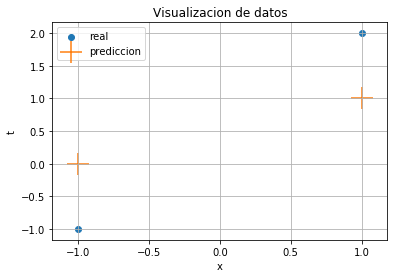

In [52]:
plt.figure()
plt.scatter(x, t)
plt.scatter(x, t_predicted, marker='+', s=500)
plt.xlabel('x')
plt.ylabel('t')
plt.legend(['real', 'prediccion'])
plt.title('Visualizacion de datos')
plt.grid(True)
plt.show()

In [53]:
# Prediccion para las entradas -3, 2, -6 y 7

nn.predict(np.array([-3, 2, -6, 7]), batch_size=None)

array([[0.999984],
       [1.      ],
       [1.      ],
       [1.      ]], dtype=float32)

### Entrenamiento de la red neuronal con batching

In [54]:
nn.fit(x, t, batch_size=2, epochs=1000, verbose=0)

In [55]:
t_predicted_b = nn.predict(x, batch_size=2)
t_predicted_b

array([[0.99999297],
       [0.00126721]], dtype=float32)

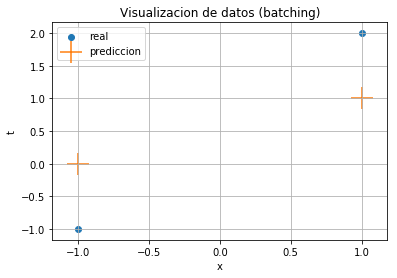

In [56]:
plt.figure()
plt.scatter(x, t)
plt.scatter(x, t_predicted_b, marker='+', s=500)
plt.xlabel('x')
plt.ylabel('t')
plt.legend(['real', 'prediccion'])
plt.title('Visualizacion de datos (batching)')
plt.grid(True)
plt.show()